In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

#Get the interactive Tools for Matplotlib
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
from gensim.models import KeyedVectors

Gensim is not really a deep learning package. It's a package for word and text similarity modelling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.
Gensim provides a libary of several sets of word vectors that you can easily laod. You can find more about GloVe on [The GloVe page](https://nlp.stanford.edu/projects/glove/). Here use the **100d vectors** `api.load("glove-wiki-gigaword-100")` below as a balance between speed and smallness vs. quality. If you try out the 50d vectors, they basically wrok for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, you'll wait longer, but they're even better than the 100d vectors.

In [3]:
model = api.load("glove-wiki-gigaword-100")
print(type(model))

[==================================================] 100.0% 128.1/128.1MB downloaded
<class 'gensim.models.keyedvectors.KeyedVectors'>


In [4]:
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

Given a string (a word) to the model, the model turns the word into a 100-dimension vector! And the datatype is numpy array. The model works as dictionary, each word(the key) has its value(the vector). So the relationship of the word and its vector is absolute.

In [22]:
model['croissant']

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

As we observe here, the vector distribution of the words **bread** and **croissant** is really close, so we can expect that the dot product of these two vectors can yield bigger value out of the likelihood function, meaning these two words are of highly similarity.
We can try use the `most_similar('str')` mothod to check the result of **croissant**.

In [23]:
model.most_similar(['croissant'])

[('croissants', 0.6829845309257507),
 ('brioche', 0.6283302307128906),
 ('baguette', 0.5968102812767029),
 ('focaccia', 0.5876684188842773),
 ('pudding', 0.5803956985473633),
 ('souffle', 0.5614768862724304),
 ('baguettes', 0.5558240413665771),
 ('tortilla', 0.5449502468109131),
 ('pastries', 0.5427731275558472),
 ('calzone', 0.5374531745910645)]

So the `most_similar(['str'])` method list out the **top 10** words of highest similarity to **croissant**, and their dot product result.

In [7]:
model.most_similar(['usa'])

[('canada', 0.6544384956359863),
 ('america', 0.645224392414093),
 ('u.s.a.', 0.6184033751487732),
 ('united', 0.6017189621925354),
 ('states', 0.5970699191093445),
 ('australia', 0.5838716626167297),
 ('world', 0.5590084791183472),
 ('2010', 0.5580702424049377),
 ('2012', 0.5504006743431091),
 ('davis', 0.5464468002319336)]

In [24]:
model['banana']

array([-0.34028  ,  0.46436  , -0.083324 ,  0.20186  , -0.17831  ,
       -0.4663   ,  0.61793  ,  0.30129  ,  0.5728   , -0.34783  ,
       -0.9216   ,  0.30484  ,  0.30382  ,  0.58035  ,  0.12112  ,
        0.77288  ,  1.1547   , -0.576    ,  0.51471  ,  0.21552  ,
        0.21106  ,  0.67875  ,  1.1962   ,  0.11142  ,  0.50809  ,
        1.1873   ,  0.035288 , -0.88952  ,  0.042803 , -0.36714  ,
        0.37993  ,  0.61945  ,  1.0194   , -0.95084  , -0.0072258,
        0.69454  ,  0.38692  , -0.18544  ,  0.2885   , -0.81279  ,
       -0.46473  , -0.82623  ,  0.42778  , -0.14064  ,  0.30173  ,
        0.074418 , -0.40044  ,  0.33969  , -0.62917  , -0.054449 ,
       -0.78469  ,  0.2354   , -0.78359  ,  0.74708  , -0.31074  ,
       -0.07038  , -0.34623  ,  0.33849  ,  0.89621  ,  0.30288  ,
        0.012978 ,  0.020869 , -0.14436  , -0.40914  ,  0.16651  ,
       -0.88124  , -0.078419 ,  0.048156 ,  0.27032  , -0.81761  ,
        0.027778 ,  0.62487  ,  0.1549   , -0.15838  ,  0.0886

In [36]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.46178483963012695),
 ('yadin', 0.4617374539375305),
 ('hundertwasser', 0.4588957130908966),
 ('ncpa', 0.45773395895957947),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947834968567)]

The `negative` argument make the `most_similar` method to look for the top-10 most irrelevant word of **banana**, as the absolute value of the negative dot product result and ranked.

In [28]:
result = model.most_similar(positive=['woman', 'king'] , negative=['man'])
#print("{}: {:.4f}".format(*result[1]))
print(result)

[('queen', 0.7698541283607483), ('monarch', 0.6843380928039551), ('throne', 0.6755736470222473), ('daughter', 0.6594555974006653), ('princess', 0.6520534157752991), ('prince', 0.6517033576965332), ('elizabeth', 0.6464518308639526), ('mother', 0.631171703338623), ('emperor', 0.6106470823287964), ('wife', 0.6098655462265015)]


And we can use `postitive` and `negative` argument together as a multivarient or covarient of the method to the give word. 
We can observe the above result and say, the word **queen** is the more *women* and less *man* of **king**, thus the queen. And we can even define an analogy function to play with this function.

In [30]:
# x1:x2 :: y1 reutnred
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

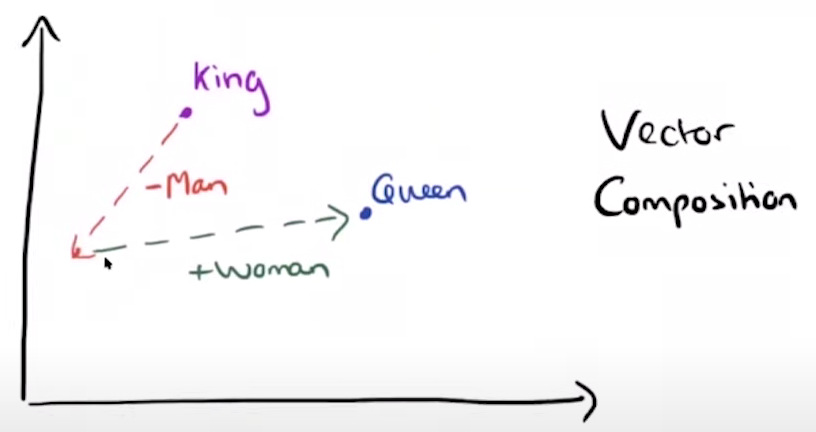

In [32]:
analogy('man', 'king', 'woman')

'queen'

In [37]:
analogy('king','woman', 'queen' )

'girl'

In [38]:
analogy('jerk', 'genius','hug')

'mentor'